In [26]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [27]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M1.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.67s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,7.210000,10.890000,14.550000,14.650000,11.800000,9.710000,9.290000,10.280000,10.700000,8.550000,...,1.540000,1.560000,-0.270000,-1.660000,-3.280000,-3.300000,0.980000,5.530000,Fp1-Fp3,subject_0
1,-46.490000,-49.470000,-52.090000,-51.410000,-50.080000,-54.000000,-60.940000,-63.550000,-62.540000,-59.860000,...,-44.450000,-47.860000,-46.360000,-44.490000,-42.490000,-39.550000,-36.340000,-34.110000,Fp1-Fp3,subject_1
2,8.180000,6.930000,5.200000,5.350000,6.170000,5.610000,3.230000,-0.160000,-2.340000,-2.060000,...,11.650000,12.590000,13.880000,13.640000,11.850000,9.840000,7.800000,5.920000,Fp1-Fp3,subject_2
3,-5.880000,-9.930000,-11.620000,-10.360000,-8.200000,-7.340000,-9.720000,-14.100000,-15.390000,-13.420000,...,-8.240000,-9.520000,-13.530000,-8.830000,2.680000,10.800000,11.980000,6.180000,Fp1-Fp3,subject_3
4,75.270000,81.670000,88.540000,96.850000,104.890000,111.450000,115.820000,118.310000,119.500000,119.710000,...,24.520000,25.240000,27.100000,28.070000,27.150000,25.460000,23.530000,21.190000,Fp1-Fp3,subject_4
5,170.120000,171.410000,168.390000,164.630000,166.860000,172.030000,172.610000,171.420000,173.430000,176.320000,...,903.060000,921.710000,896.230000,850.060000,833.760000,839.200000,826.510000,799.010000,Fp1-Fp3,subject_5
6,86.810000,76.440000,66.300000,60.330000,56.650000,51.490000,45.330000,42.500000,44.140000,46.280000,...,-8.570000,-10.010000,-10.080000,-7.630000,-8.930000,-14.750000,-19.430000,-22.840000,Fp1-Fp3,subject_6
7,-27.510000,-23.340000,-17.400000,-11.000000,-8.320000,-12.070000,-15.870000,-16.790000,-13.800000,-1.490000,...,-32.500000,-46.060000,-52.640000,-49.630000,-36.750000,-26.990000,-28.230000,-22.990000,Fp1-Fp3,subject_7
8,7.370000,3.560000,-0.290000,-0.990000,1.100000,2.120000,0.880000,0.370000,0.180000,-1.320000,...,-35.790000,-39.100000,-39.070000,-36.760000,-34.740000,-32.880000,-31.240000,-31.900000,Fp1-Fp3,subject_8
9,-56.740000,-51.250000,-46.830000,-51.940000,-56.320000,-52.010000,-49.200000,-50.730000,-49.910000,-44.880000,...,-12.500000,-28.290000,-29.040000,-19.240000,-16.000000,-19.620000,-31.290000,-41.860000,Fp1-Fp3,subject_9


In [28]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,7.21,10.89,14.55,14.65,11.80,9.71,9.29,10.28,10.70,8.55,...,1.54,1.56,-0.27,-1.66,-3.28,-3.30,0.98,5.53,Fp1-Fp3,subject_0
1,-46.49,-49.47,-52.09,-51.41,-50.08,-54.00,-60.94,-63.55,-62.54,-59.86,...,-44.45,-47.86,-46.36,-44.49,-42.49,-39.55,-36.34,-34.11,Fp1-Fp3,subject_1
2,8.18,6.93,5.20,5.35,6.17,5.61,3.23,-0.16,-2.34,-2.06,...,11.65,12.59,13.88,13.64,11.85,9.84,7.80,5.92,Fp1-Fp3,subject_2
3,-5.88,-9.93,-11.62,-10.36,-8.20,-7.34,-9.72,-14.10,-15.39,-13.42,...,-8.24,-9.52,-13.53,-8.83,2.68,10.80,11.98,6.18,Fp1-Fp3,subject_3
4,75.27,81.67,88.54,96.85,104.89,111.45,115.82,118.31,119.50,119.71,...,24.52,25.24,27.10,28.07,27.15,25.46,23.53,21.19,Fp1-Fp3,subject_4
5,170.12,171.41,168.39,164.63,166.86,172.03,172.61,171.42,173.43,176.32,...,903.06,921.71,896.23,850.06,833.76,839.20,826.51,799.01,Fp1-Fp3,subject_5
6,86.81,76.44,66.30,60.33,56.65,51.49,45.33,42.50,44.14,46.28,...,-8.57,-10.01,-10.08,-7.63,-8.93,-14.75,-19.43,-22.84,Fp1-Fp3,subject_6
7,-27.51,-23.34,-17.40,-11.00,-8.32,-12.07,-15.87,-16.79,-13.80,-1.49,...,-32.50,-46.06,-52.64,-49.63,-36.75,-26.99,-28.23,-22.99,Fp1-Fp3,subject_7
8,7.37,3.56,-0.29,-0.99,1.10,2.12,0.88,0.37,0.18,-1.32,...,-35.79,-39.10,-39.07,-36.76,-34.74,-32.88,-31.24,-31.90,Fp1-Fp3,subject_8
9,-56.74,-51.25,-46.83,-51.94,-56.32,-52.01,-49.20,-50.73,-49.91,-44.88,...,-12.50,-28.29,-29.04,-19.24,-16.00,-19.62,-31.29,-41.86,Fp1-Fp3,subject_9


In [29]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
28,-0.820000,-1.020000,2.580000,8.490000,16.340000,22.660000,17.310000,0.640000,-19.100000,-35.590000,...,-3.900000,-2.620000,-0.800000,0.560000,0.970000,1.250000,1.760000,1.900000,Fp1,subject_28
29,-0.170000,-1.380000,-5.030000,-9.030000,-9.550000,-7.440000,-4.420000,-1.910000,-2.660000,-5.230000,...,49.070000,51.930000,51.520000,45.570000,36.830000,29.300000,24.040000,20.660000,Fp1,subject_29
30,-3.880000,-5.110000,8.810000,26.210000,36.040000,39.680000,31.540000,18.890000,21.500000,34.950000,...,4.280000,4.260000,4.020000,4.060000,4.730000,5.960000,7.180000,8.180000,Fp1,subject_30
31,-21.050000,-34.290000,-54.020000,-75.990000,-87.730000,-93.730000,-97.200000,-92.530000,-83.560000,-81.780000,...,24.810000,25.490000,25.380000,25.470000,25.830000,26.640000,28.370000,30.780000,Fp1,subject_31
32,3.910000,9.150000,11.260000,16.750000,21.700000,23.000000,27.870000,32.490000,31.900000,29.210000,...,22.270000,36.070000,52.430000,67.670000,79.980000,89.960000,98.910000,107.410000,Fp1,subject_32
33,3.920000,-1.970000,-8.330000,-9.190000,-7.000000,0.270000,8.350000,5.680000,-4.710000,-7.900000,...,8.220000,10.320000,11.550000,11.440000,11.380000,12.020000,13.580000,15.570000,Fp1,subject_33
34,17.180000,26.800000,27.510000,21.200000,10.390000,3.870000,9.050000,17.560000,17.330000,11.940000,...,0.090000,1.070000,2.640000,4.570000,7.050000,9.290000,10.070000,9.230000,Fp1,subject_34
35,5.040000,9.170000,14.300000,18.910000,20.230000,19.540000,19.320000,19.800000,20.660000,22.620000,...,-25.040000,-24.610000,-26.080000,-29.570000,-33.790000,-36.490000,-36.370000,-34.030000,Fp1,subject_35
36,0.793521,4.159219,7.489568,15.154911,23.879443,27.382995,27.122853,24.178362,18.694505,15.534063,...,-3.032691,-3.749239,-4.565954,-3.823039,-1.354473,1.610694,3.785934,4.734353,Fp1,subject_36
37,-25.240000,-50.480000,-78.120000,-97.970000,-100.780000,-94.210000,-89.560000,-88.210000,-86.950000,-84.450000,...,45.710000,50.490000,58.290000,65.200000,69.810000,71.920000,73.070000,76.580000,Fp1,subject_37


In [30]:
ch_names = ['Fp1-Fp3']*75000
# extract the data values and the channel names
data = df1.iloc[:, :-2].values.T  # transpose the data so that channels are in rows
ch_types = ['eeg']*75000
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_15592\2218616082.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


Creating RawArray with float64 data, n_channels=75000, n_times=28
    Range : 0 ... 27 =      0.000 ...     0.105 secs
Ready.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [32]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 75000 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_15592\3536447973.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 97.7s.


Method,fastica
Fit,12 iterations on raw data (28 samples)
ICA components,20
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=28
    Range : 0 ... 27 =      0.000 ...     0.105 secs
Ready.


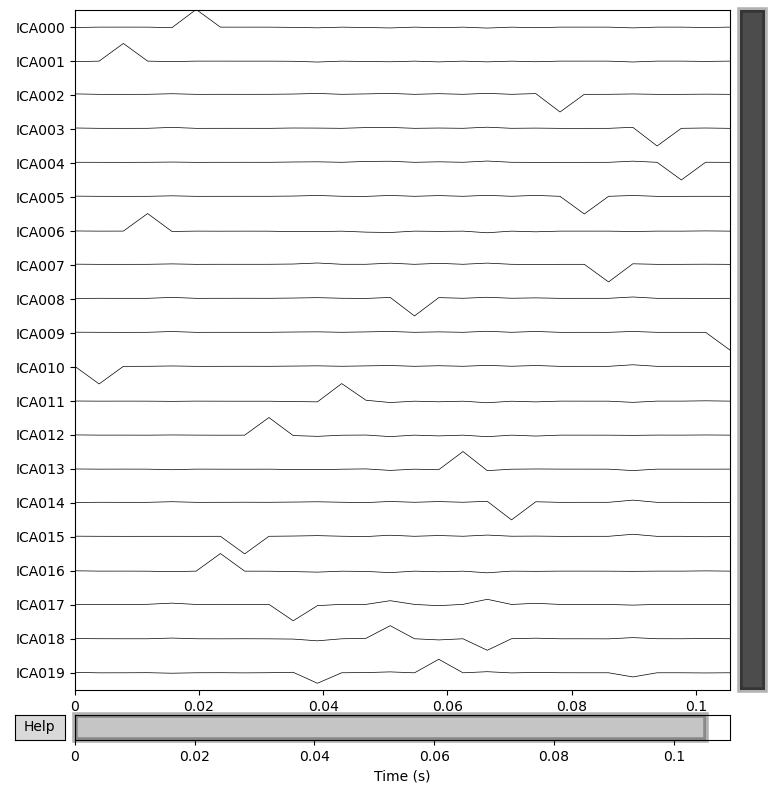

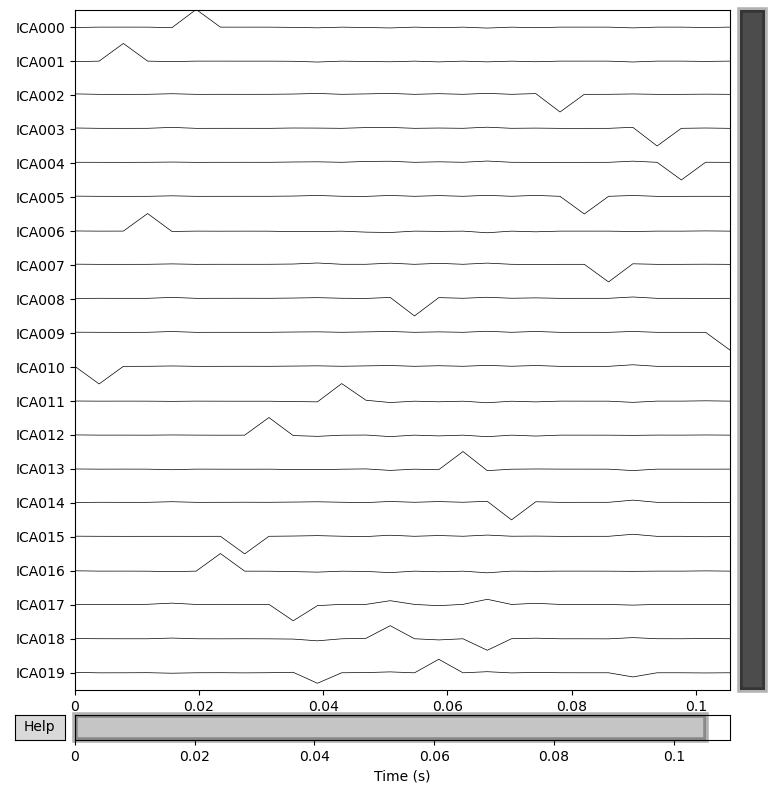

In [33]:
 ica.plot_sources(raw, block=False)

Component 0 has 68 large amplitude peaks, possibly eye blinks
Component 1 has 9 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 28, using nperseg = 28
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 17, using nperseg = 17
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is

Component 2 has 14 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 203, using nperseg = 203
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 4, using nperseg = 4
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 40, using nperseg = 40
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 135, using nperseg = 135
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 3 has 3 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 184, using nperseg = 184
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 170, using nperseg = 170
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 5 has 1 large amplitude peaks, possibly eye blinks
Component 6 has 2 large amplitude peaks, possibly eye blinks
Component 8 has 1 large amplitude peaks, possibly eye blinks
Component 9 has 2 large amplitude peaks, possibly eye blinks
Component 11 has 1 large amplitude peaks, possibly eye blinks


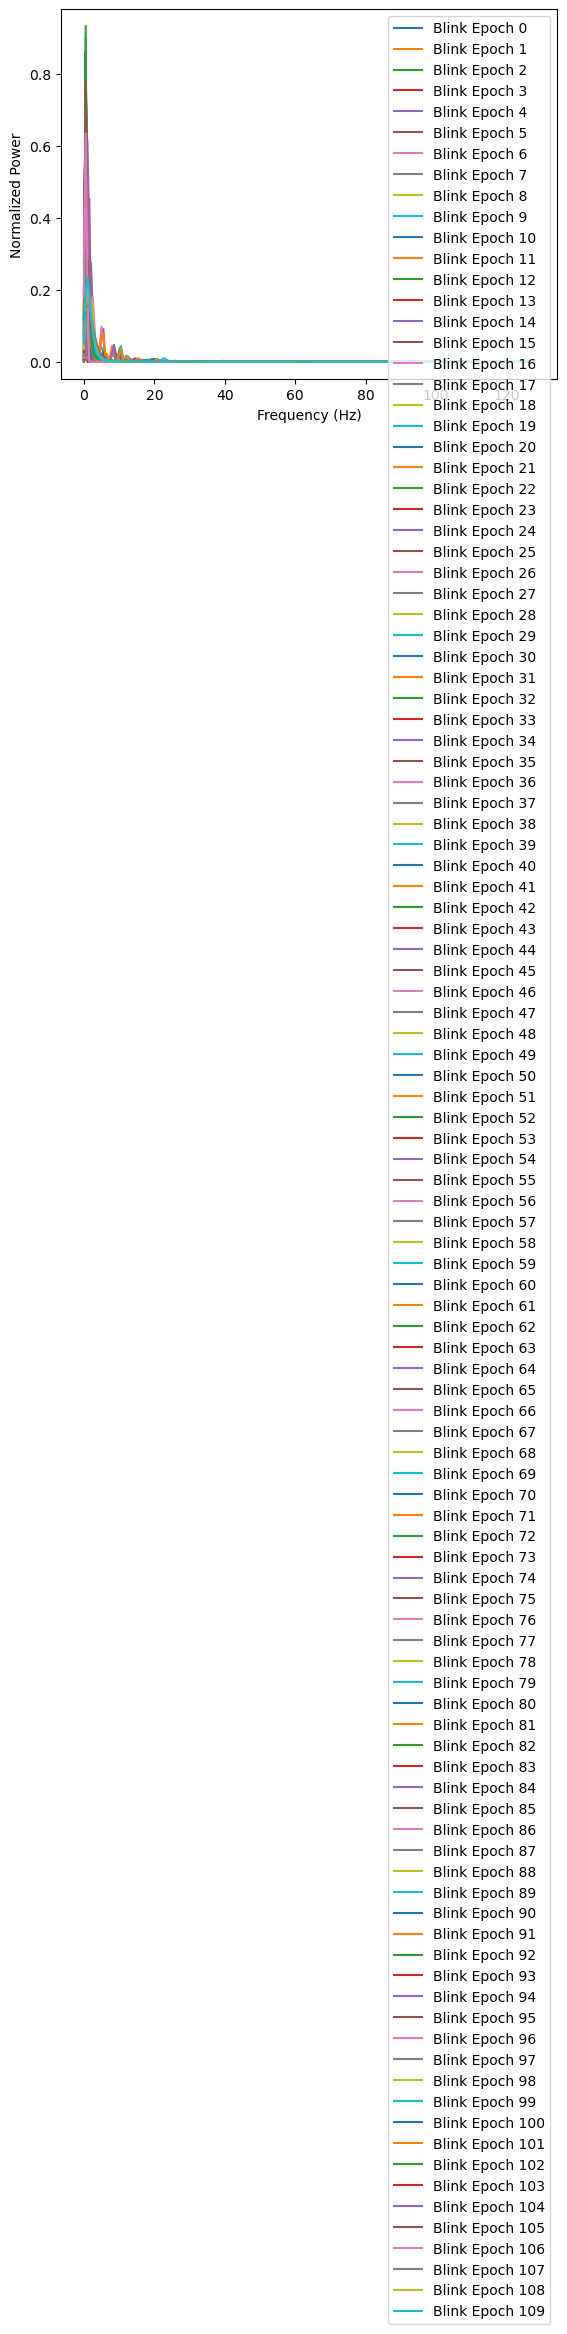

Total number of eye blinks detected:  9


In [34]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized, label='Blink Epoch {}'.format(i))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend()
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


Component 0 has 68 large amplitude peaks, possibly eye blinks
Component 1 has 9 large amplitude peaks, possibly eye blinks
Component 2 has 14 large amplitude peaks, possibly eye blinks
Component 3 has 3 large amplitude peaks, possibly eye blinks
Component 5 has 1 large amplitude peaks, possibly eye blinks
Component 6 has 2 large amplitude peaks, possibly eye blinks
Component 8 has 1 large amplitude peaks, possibly eye blinks
Component 9 has 2 large amplitude peaks, possibly eye blinks
Component 11 has 1 large amplitude peaks, possibly eye blinks


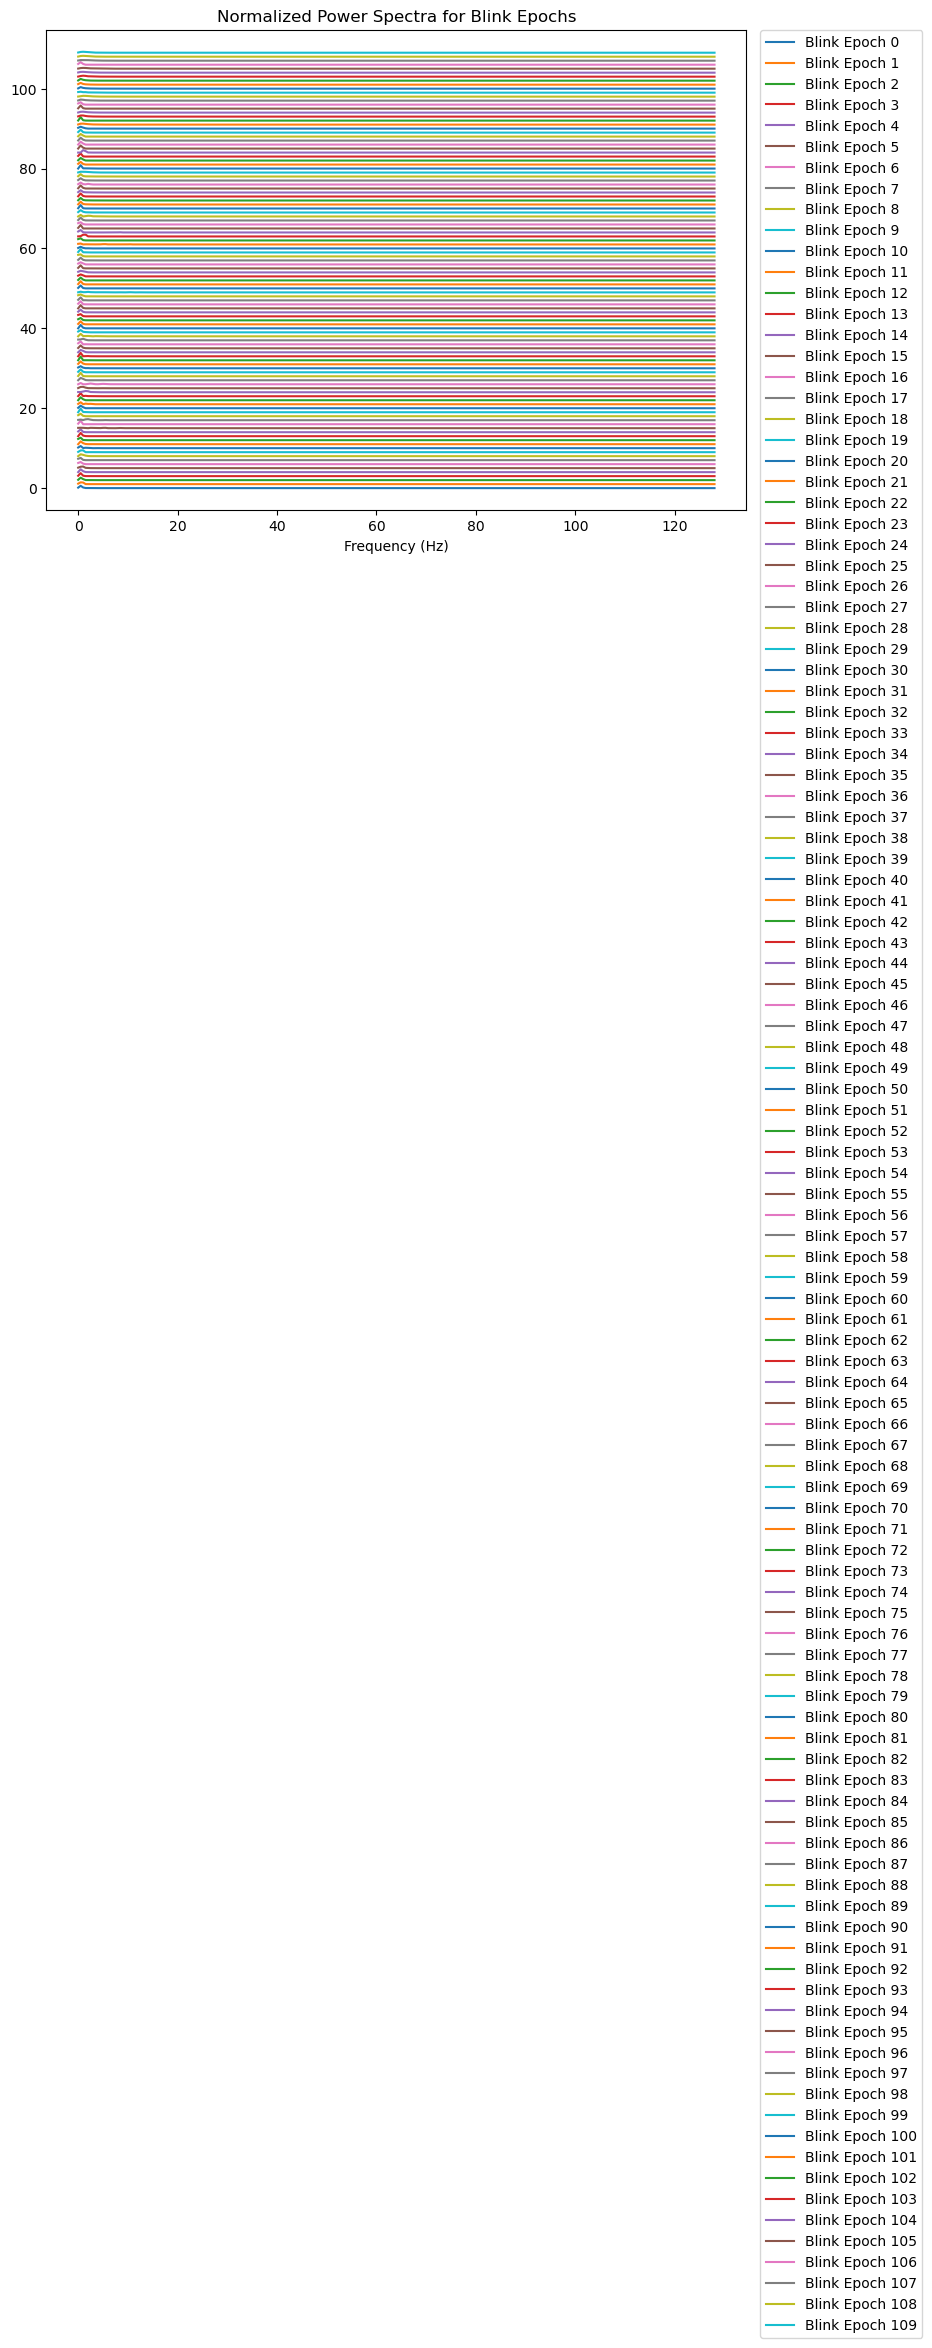

Total number of eye blinks detected:  9


In [35]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
# Plot the normalized power spectra for each blink epoch
fig, ax = plt.subplots(figsize=(10, 6))
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized + i, label='Blink Epoch {}'.format(i))

# Set plot title and labels
ax.set_title('Normalized Power Spectra for Blink Epochs')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('')

# Add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust subplot parameters to avoid overlapping of curves
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Show the plot
plt.show()


print("Total number of eye blinks detected: ", len(blink_indices))


Effective window size : 0.109 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_15592\4255613943.py:16: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=28).
  plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])


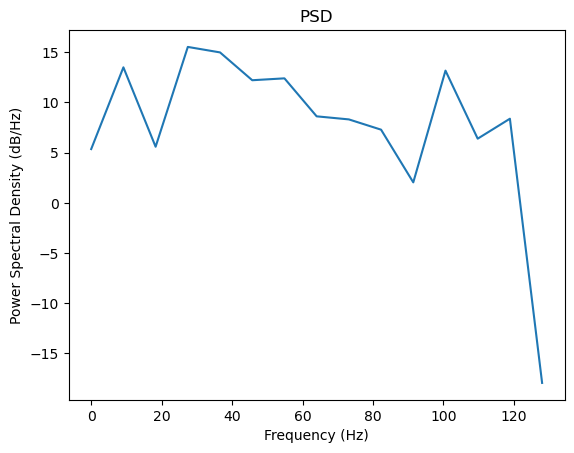

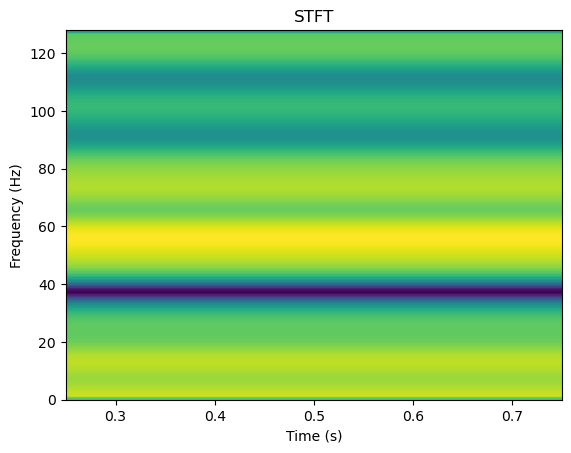

In [36]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 28
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

for remaing data apart from first 28 subjects.

In [37]:
data = df2.iloc[:, :-2].values.T 
ch_names = ['Fp1']*75000
# extract the data values and the channel names
ch_types = ['eeg']*75000
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_15592\2702234946.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


Creating RawArray with float64 data, n_channels=75000, n_times=23
    Range : 0 ... 22 =      0.000 ...     0.086 secs
Ready.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 75000 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_15592\3602276034.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 88.9s.


Method,fastica
Fit,26 iterations on raw data (23 samples)
ICA components,20
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
 ica.plot_sources(raw, block=False)

In [ ]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized, label='Blink Epoch {}'.format(i))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend()
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


In [ ]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
# Plot the normalized power spectra for each blink epoch
fig, ax = plt.subplots(figsize=(10, 6))
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized + i, label='Blink Epoch {}'.format(i))

# Set plot title and labels
ax.set_title('Normalized Power Spectra for Blink Epochs')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('')

# Add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust subplot parameters to avoid overlapping of curves
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Show the plot
plt.show()


print("Total number of eye blinks detected: ", len(blink_indices))


In [ ]:
type(raw)

In [ ]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()